In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as pltticker
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from joblib import parallel_backend
import pickle
import re
import dataframe_image as dfi
from project_functions.utils import picklify, unpickle
from project_functions.visualizations import configure_axislabels_and_title, configure_ticklabels_and_params
from project_functions.visualizations import plot_feature_importances, plot_confusion_matrix_fancy
from project_functions.visualizations import encode_target, get_scores_as_frame, get_all_scores
import warnings
warnings.filterwarnings('ignore')

In [2]:
X_test_count_unigrams = unpickle('../data/cleaned/test/X_test_count_unigrams.pickle')
X_test_count_bigrams = unpickle('../data/cleaned/test/X_test_count_bigrams.pickle')
X_test_gensim_2gram_sparse = unpickle('../data/cleaned/test/X_test_gensim_2gram_sparse.pickle').T
X_test_gensim_3gram_sparse = unpickle('../data/cleaned/test/X_test_gensim_3gram_sparse.pickle').T
X_test_gensim_4gram_sparse = unpickle('../data/cleaned/test/X_test_gensim_4gram_sparse.pickle').T
X_test_glove = unpickle('../data/cleaned/test/X_test_glove.pickle')
X_test_word2vec = unpickle('../data/cleaned/test/X_test_word2vec.pickle')
y_test = unpickle('../data/cleaned/test/y_test.pickle')
y_test_encoded = encode_target(y_test)

In [3]:
mnb_count_unigrams = unpickle('../data/models/mnb_count_unigrams.pickle')
mnb_count_bigrams = unpickle('../data/models/mnb_count_bigrams.pickle')
mnb_gensim_2gram = unpickle('../data/models/mnb_gensim_2gram.pickle')
mnb_gensim_3gram = unpickle('../data/models/mnb_gensim_3gram.pickle')
mnb_gensim_4gram = unpickle('../data/models/mnb_gensim_4gram.pickle')
baseline_xg_gensim_2gram = unpickle('../data/models/baseline_xg_gensim_2gram.pickle')
best_xg_gensim_2gram = unpickle('../data/models/best_xg_gensim_2gram.pickle')
baseline_xg_gensim_3gram = unpickle('../data/models/baseline_xg_gensim_3gram.pickle')
best_xg_gensim_3gram = unpickle('../data/models/best_xg_gensim_3gram.pickle')
baseline_xg_gensim_4gram = unpickle('../data/models/baseline_xg_gensim_4gram.pickle')
best_xg_gensim_4gram = unpickle('../data/models/best_xg_gensim_4gram.pickle')
baseline_xg_glove = unpickle('../data/models/baseline_xg_glove.pickle')
best_xg_glove = unpickle('../data/models/best_xg_glove.pickle')
baseline_xg_word2vec = unpickle('../data/models/baseline_xg_word2vec.pickle')
best_xg_word2vec = unpickle('../data/models/best_xg_word2vec.pickle')

In [4]:
X_tests = [X_test_count_unigrams, X_test_count_bigrams,
           X_test_gensim_2gram_sparse, X_test_gensim_3gram_sparse, X_test_gensim_4gram_sparse,
           X_test_gensim_2gram_sparse, X_test_gensim_3gram_sparse, X_test_gensim_4gram_sparse,
           X_test_gensim_2gram_sparse, X_test_gensim_3gram_sparse, X_test_gensim_4gram_sparse,
           X_test_glove, X_test_word2vec, X_test_glove, X_test_word2vec]
models = [mnb_count_unigrams, mnb_count_bigrams,
          mnb_gensim_2gram, mnb_gensim_3gram, mnb_gensim_4gram,
          baseline_xg_gensim_2gram, baseline_xg_gensim_3gram, baseline_xg_gensim_4gram,
          best_xg_gensim_2gram, best_xg_gensim_3gram, best_xg_gensim_4gram,
          baseline_xg_glove, baseline_xg_word2vec, best_xg_glove, best_xg_word2vec]
model_labels = ['mnb_count_uni', 'mnb_count_bi', 'mnb_gen_2g', 'mnb_gen_3g', 'mnb_gen_4g',
                'base_xg_gen_2g', 'base_xg_gen_3g', 'base_xg_gen_4g',
                'best_xg_gen_2g', 'best_xg_gen_3g', 'best_xg_gen_4g',
                'base_xg_glove', 'base_xg_word2vec', 'best_xg_glove', 'best_xg_word2vec']
 

In [5]:
scores = get_all_scores(X_tests, y_test_encoded, models, model_labels)

In [6]:
scores

,model,accuracy
0,mnb_count_uni,0.356950
0,mnb_count_bi,0.355777
0,mnb_gen_2g,0.501818
0,mnb_gen_3g,0.501935
0,mnb_gen_4g,0.500528
0,base_xg_gen_2g,0.494780
0,base_xg_gen_3g,0.494663
0,base_xg_gen_4g,0.498534
0,best_xg_gen_2g,0.522933
0,best_xg_gen_3g,0.524575


In [7]:
scores.sort_values('accuracy', ascending = False)

,model,accuracy
0,best_xg_gen_4g,0.526100
0,best_xg_gen_3g,0.524575
0,best_xg_gen_2g,0.522933
0,mnb_gen_3g,0.501935
0,mnb_gen_2g,0.501818
0,mnb_gen_4g,0.500528
0,base_xg_gen_4g,0.498534
0,base_xg_gen_2g,0.494780
0,base_xg_gen_3g,0.494663
0,best_xg_word2vec,0.477654


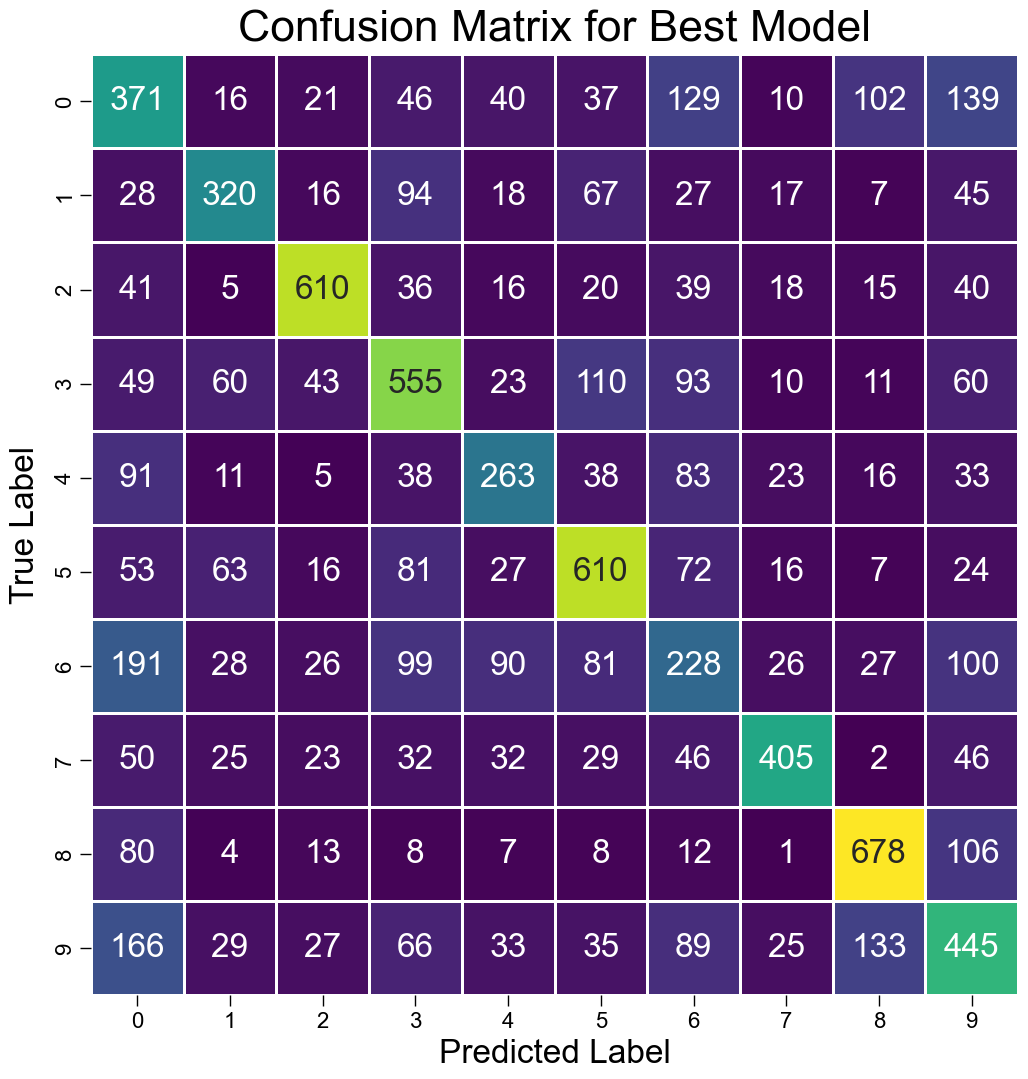

In [4]:
fig, ax = plot_confusion_matrix_fancy(X_test_gensim_4gram_sparse, y_test_encoded, best_xg_gensim_4gram);

configure_axislabels_and_title('Predicted Label', 'True Label', 'Confusion Matrix for Best Model', ax = ax)
configure_ticklabels_and_params(ax = ax)

plt.savefig('../visualizations/best_model_confusion_matrix.png', bbox_inches = 'tight')

In [14]:
tsne_gensim_4gram = unpickle('../data/tsne/tsne_gensim_4gram.pickle')

In [15]:
tsne_gensim_4gram_train_only = tsne_gensim_4gram.loc[~tsne_gensim_4gram.index.isin(y_test.index)]
tsne_gensim_4gram_test_only = tsne_gensim_4gram.loc[tsne_gensim_4gram.index.isin(y_test.index)]

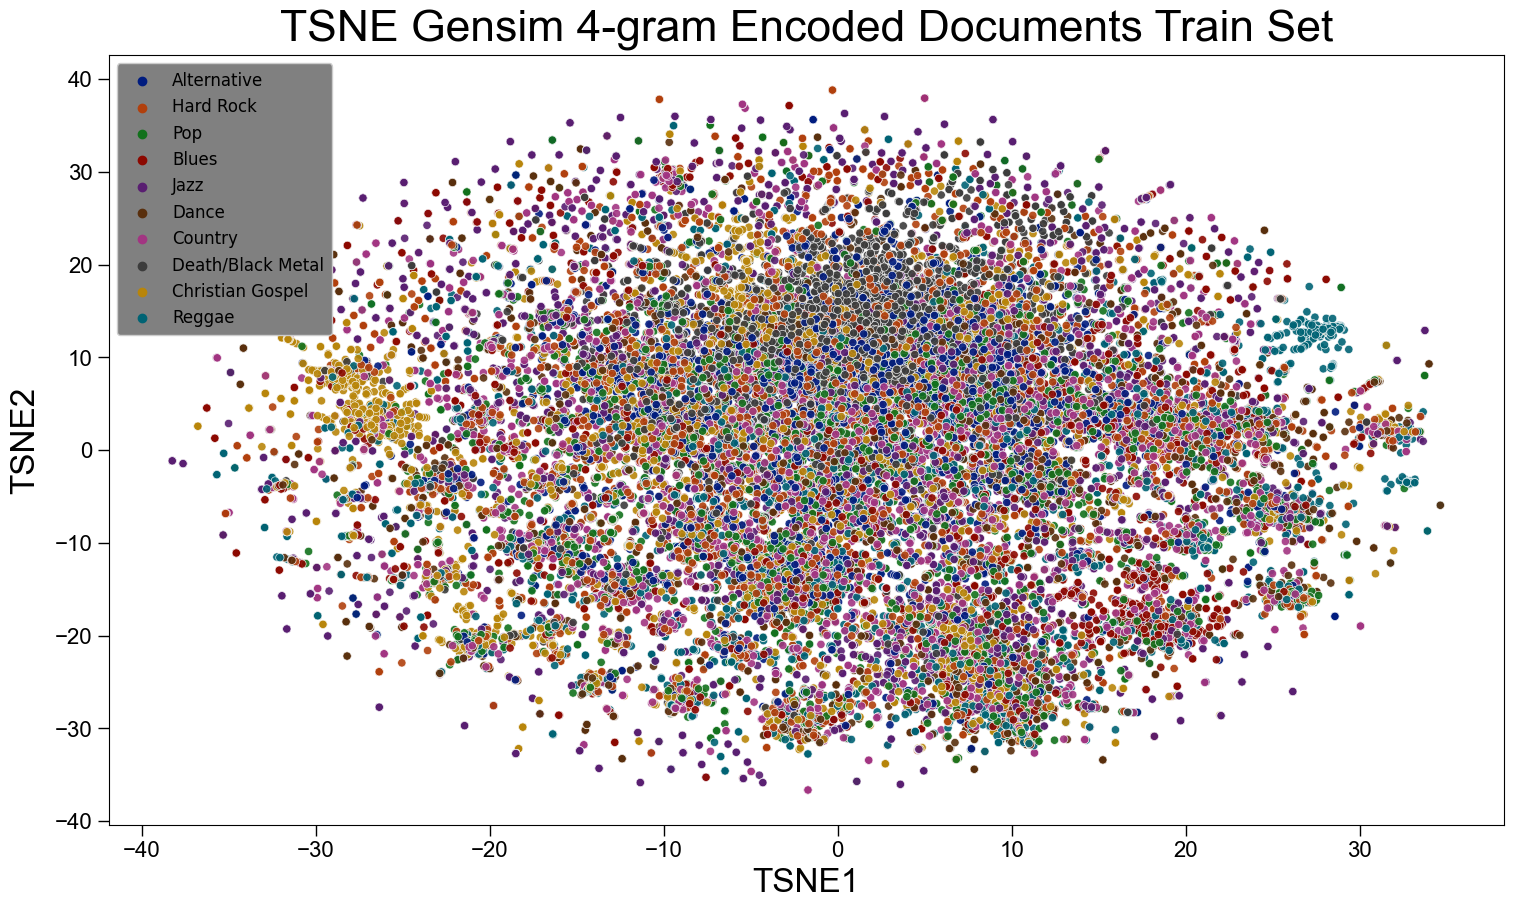

In [18]:
fig, ax = plt.subplots(figsize = (18, 10))

labels = ['Alternative', 'Hard Rock', 'Pop', 'Blues', 'Jazz', 'Dance',
          'Country', 'Death/Black Metal', 'Christian Gospel', 'Reggae']

sns.scatterplot(data = tsne_gensim_4gram_train_only, x = 'TSNE1', y = 'TSNE2',
                hue = 'genre', palette = 'dark', alpha = 0.9,
#                 label = labels, legend = 'full'
               );

configure_axislabels_and_title('TSNE1', 'TSNE2', 'TSNE Gensim 4-gram Encoded Documents Train Set', ax = ax)
configure_ticklabels_and_params(ax = ax)


handles = [i for i in ax.get_legend_handles_labels()][0]


ax.legend(handles = handles, labels = labels, loc = 2, labelcolor = 'black',
          frameon = True, facecolor = 'grey', fontsize = 12,
          fancybox = True, framealpha = 1, borderpad = 0.5);

plt.savefig('../visualizations/TSNE_gensim_4gram_train.png', bbox_inches = 'tight')

In [20]:
predicted_genres = best_xg_gensim_4gram.predict(X_test_gensim_4gram_sparse)

In [21]:
genre_map = {
    0: 'Alternative',
    1: 'Blues',
    2: 'Christian Gospel',
    3: 'Country',
    4: 'Dance',
    5: 'Jazz',
    6: 'Pop',
    7: 'Reggae',
    8: 'Death/Black Metal',
    9: 'Hard Rock'
}

In [22]:
predicted_genres = pd.DataFrame(predicted_genres, columns = ['predicted_genre'], index = y_test.index)

In [23]:
tsne_gensim_4gram_test_only = pd.concat([tsne_gensim_4gram_test_only, predicted_genres], axis = 1)
tsne_gensim_4gram_test_only.predicted_genre = tsne_gensim_4gram_test_only.predicted_genre.replace(genre_map)

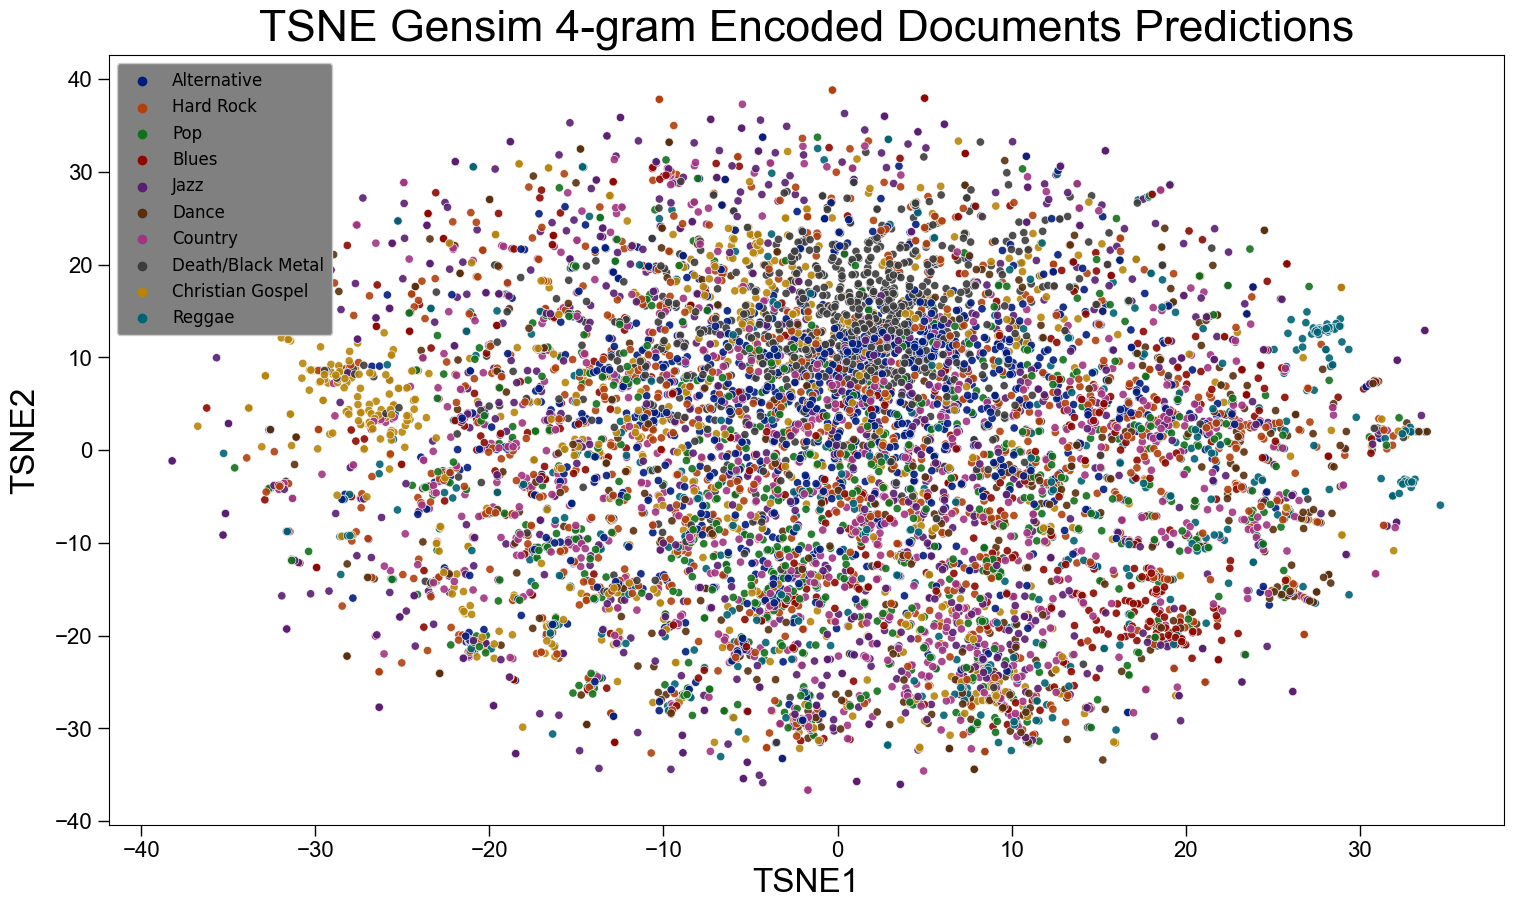

In [24]:
fig, ax = plt.subplots(figsize = (18, 10))

labels = ['Alternative', 'Hard Rock', 'Pop', 'Blues', 'Jazz', 'Dance',
          'Country', 'Death/Black Metal', 'Christian Gospel', 'Reggae']

sns.scatterplot(data = tsne_gensim_4gram_test_only, x = 'TSNE1', y = 'TSNE2',
                hue = 'predicted_genre', hue_order = labels, palette = 'dark', alpha = 0.9,
#                 label = labels, legend = 'full'
               );

configure_axislabels_and_title('TSNE1', 'TSNE2', 'TSNE Gensim 4-gram Encoded Documents Predictions', ax = ax)
configure_ticklabels_and_params(ax = ax)


handles = [i for i in ax.get_legend_handles_labels()][0]


ax.legend(handles = handles, labels = labels, loc = 2, labelcolor = 'black',
          frameon = True, facecolor = 'grey', fontsize = 12,
          fancybox = True, framealpha = 1, borderpad = 0.5);

plt.savefig('../visualizations/TSNE_gensim_4gram_test.png', bbox_inches = 'tight')

In [24]:
print(classification_report(y_test_encoded, best_xg_gensim_4gram.predict(X_test_gensim_4gram_sparse)))

              precision    recall  f1-score   support

           0       0.33      0.41      0.37       911
           1       0.57      0.50      0.53       639
           2       0.76      0.73      0.74       840
           3       0.53      0.55      0.54      1014
           4       0.48      0.44      0.46       601
           5       0.59      0.63      0.61       969
           6       0.28      0.25      0.27       896
           7       0.74      0.59      0.65       690
           8       0.68      0.74      0.71       917
           9       0.43      0.42      0.43      1048

    accuracy                           0.53      8525
   macro avg       0.54      0.53      0.53      8525
weighted avg       0.53      0.53      0.53      8525



In [4]:
tokenized_data_main_genres = pd.read_parquet('../data/cleaned/tokenized_data_large_genres.parquet')

In [5]:
genre_values = tokenized_data_main_genres.genre_name.value_counts()

In [6]:
genre_values

Rock-Hard-Rock                  5242
Country                         5070
Jazz                            4845
Rock-Death-Metal-Black-Metal    4587
Alternative                     4555
Pop                             4479
Christian-Gospel                4198
Reggae                          3451
Blues                           3193
Dance                           3004
Name: genre_name, dtype: int64

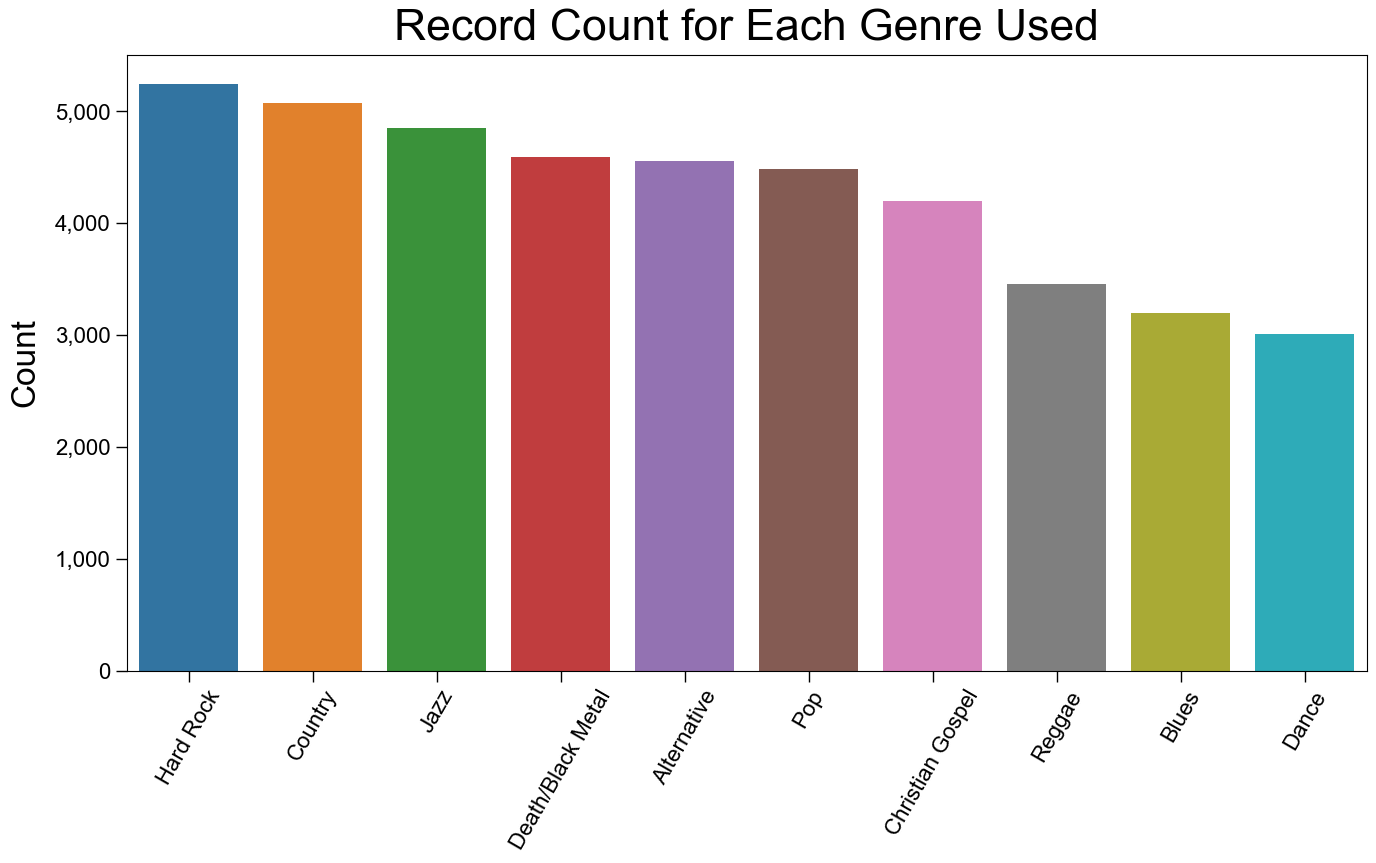

In [13]:
fig, ax = plt.subplots(figsize = (16, 8))

sns.barplot(x = genre_values.index.tolist(), y = genre_values.values.tolist());
configure_axislabels_and_title(None, 'Count', 'Record Count for Each Genre Used', ax = ax)

ax.get_yaxis().set_major_formatter(pltticker.FuncFormatter(lambda x, p: format(int(x),',')))
ax.set_xticklabels(['Hard Rock', 'Country', 'Jazz', 'Death/Black Metal', 'Alternative', 'Pop',
                    'Christian Gospel', 'Reggae', 'Blues', 'Dance'])

plt.xticks(rotation = 60)

configure_ticklabels_and_params(ax = ax)

plt.savefig('../visualizations/genre_count.png', bbox_inches = 'tight')